In [26]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objects as go

In [28]:
# Load the Google Trends data for the keyword "spa" in Bulgaria from the Excel file
df = pd.read_excel('data.xlsx')

In [30]:
# Convert the 'week' column to datetime type
df['week'] = pd.to_datetime(df['week'])

In [32]:
# Calculate a 4-week moving average for trend visualization
df['moving_avg'] = df['interest'].rolling(window=4).mean()

In [34]:
# Detect peaks and troughs for dynamic annotation
peak = df[df['interest'] == df['interest'].max()]
trough = df[df['interest'] == df['interest'].min()]

In [36]:
# Create a Plotly figure
fig = go.Figure()

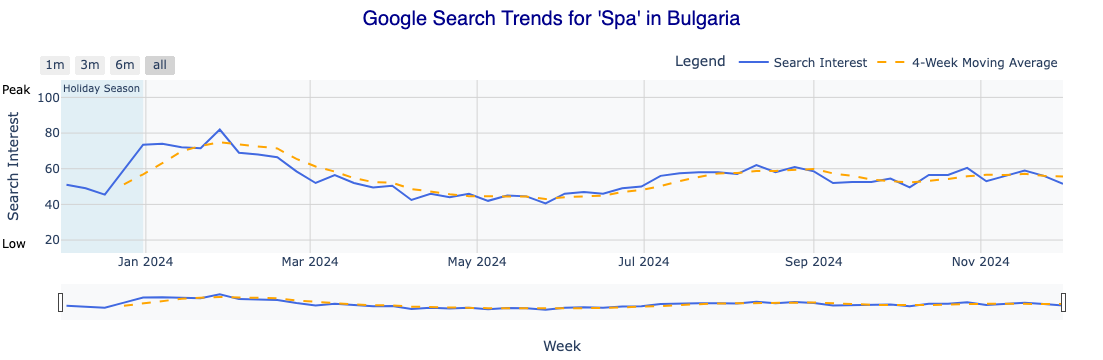

In [15]:
# Create a Plotly figure
fig = go.Figure()

# Add the time-series line plot for raw data
fig.add_trace(go.Scatter(
    x=df['week'],
    y=df['interest'],
    mode='lines',
    name='Search Interest',
    line=dict(color='royalblue'),
    hovertemplate="Week: %{x}<br>Search Interest: %{y}",
))

# Add the moving average trend line
fig.add_trace(go.Scatter(
    x=df['week'],
    y=df['moving_avg'],
    mode='lines',
    name='4-Week Moving Average',
    line=dict(color='orange', dash='dash'),
    hovertemplate="Week: %{x}<br>4-Week Avg: %{y}",
))

# Add annotations for the detected peak and trough
fig.add_annotation(
    x=peak['week'].values[0],
    y=peak['interest'].values[0],
    text="Peak",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=12, color="black"),
    arrowcolor="crimson",
)

fig.add_annotation(
    x=trough['week'].values[0],
    y=trough['interest'].values[0],
    text="Low",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40,
    font=dict(size=12, color="black"),
    arrowcolor="crimson",
)

# Add a shaded region to highlight the holiday season with smaller font size
fig.add_vrect(
    x0="2023-12-01", x1="2023-12-31",
    fillcolor="lightblue", opacity=0.3,
    layer="below", line_width=0,
    annotation_text="Holiday Season",
    annotation_position="top left",
    annotation_font_size=10  # Reduced font size
)

# Enhance layout with a clean, modern style, center the title, and add spacing
fig.update_layout(
    title=dict(
        text="Google Search Trends for 'Spa' in Bulgaria",
        x=0.5,  # Center the title
        y=0.97,  # Adjust vertical position to add space below the title
        font=dict(size=20, family="Helvetica, sans-serif", color="darkblue")
    ),
    xaxis_title="Week",
    yaxis_title="Search Interest",
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    template="plotly_white",
    plot_bgcolor="#f8f9fa",  # Light gray background
    hovermode="x unified",
    legend=dict(
        title="Legend",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
    autosize=True,
    height=600,  # Adjust height for a clean display
    margin=dict(l=40, r=40, t=80, b=40),  # Add margin above/below title
)

# Add a range slider and buttons for better interactivity
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
)

# Show the plot
fig.show()


In [17]:
# Save the plot as an interactive HTML file for embedding
fig.write_html("spa_search_trends.html")